# Comparing Linear Seach and Binary Search 
## MSDS-432 - Kiley - Week 1 Assignment
### Assignment Overview
The mini-programming assignment requires us to compare the computational performance of two searching algorithms as applied in Python.
The two algorithms to be compared are **Simple Search** (called Linear Search) and **Binary Search**.

The algorithms performance will be measured using Big O notation. <br>
**Big O Notation** is a way to communicate the number of operations required to perform an algorithm in the worst-case scenario.  The number of operations is represented by n.
For search algorithms, the worst-case scenario is when the requested value is in the last place the algorithm searches.  This requires that the algorithm view all of the data.

From *Grokking Algorithms* we expect that **Simple Search** will have O(n) performance. <br>
We expect **Binary Search** to have O(log n ) performance.

This assignment is git controlled.  The repo was prepared using git bash.

# Setting up working environment, define and test key functions
The packages selected in "In[1]" are all the packages required for the subsequent operations. <br>
They are named based on standard python naming conventions.

In [1]:
# Set up working environment
import numpy as np
import time
import pandas as pd
import matplotlib.pyplot as plt

**Linear Search** leverages code adapted from stack overflow with slight modifications.
https://stackoverflow.com/questions/43302810/linear-search-python <br>
The code was adapted to follow the same testing pattern used in the Binary Search function.<br>
We will define it as a function so that it may be applied to multiple arrays consistently and quickly.

**Linear Search** (called Simple Search in *Grokking Algorithms*) is an alogorithm that operates in O(n) time.  <br>
A linear search operates by checking requested value against every item in the list serially, begining with the first item in the list.

Note: This alogirthm does not require a pre-sort to be effective as it will search until it finds the value or exhausts the list.  However, to ensure that we can test a worst-case scenario we will sort prior to running the tests.

In [2]:
# Define Linear Search
def linear_search(list, item):
    found = None
    position = 0
    while position < len(list) and not found:
        if list[position] == item:
            found = position
        position = position + 1
    return found

In [3]:
# Check that linear search works
my_list = [1, 3, 5, 7, 9]
print(linear_search(my_list, 3)) # => 1

# 'None' means nil in Python. We use to indicate that the item wasn't found.
print(linear_search(my_list, -1)) # => None

1
None


**Results of the test: The algorithm works as expected. <br>
Linear search returned the correct locations of the requested values.**
<br>
<br>
<br>
**Binary Search** leverages code from *Grokking Algorithms*; the code was sourced from github.
https://github.com/egonSchiele/grokking_algorithms/blob/master/01_introduction_to_algorithms/python/01_binary_search.py
We will define it as a function so that it may be applied to multiple arrays consistently and quickly.

**Binary search** is an alogrithm that operates in O(log n) time. <br>
A binary search requires that the values of the list be sorted prior to running the algorithm.
The algorithm recursively finds the mid-point of the sorted dataset and determines if the value is to the left of, or right of the mid-point (less than or greater than).  
The algorithm effectively eliminates the half of the data that is no longer needed at each iteration until it finds the requested value. 

Because it can eliminate substanial portions of the data at each step, the data is significantly more efficent and scales much better than Linear Search.

In [4]:
# Define binary search
def binary_search(list, item):
  # low and high keep track of which part of the list you'll search in.
  low = 0
  high = len(list) - 1

  # While you haven't narrowed it down to one element ...
  while low <= high:
    # ... check the middle element
    mid = (low + high) // 2
    guess = list[mid]
    # Found the item.
    if guess == item:
      return mid
    # The guess was too high.
    if guess > item:
      high = mid - 1
    # The guess was too low.
    else:
      low = mid + 1

  # Item doesn't exist
  return None

In [5]:
# Check that binary serach works
my_list = [1, 3, 5, 7, 9]
print(binary_search(my_list, 3)) # => 1

# 'None' means nil in Python. We use to indicate that the item wasn't found.
print(binary_search(my_list, -1)) # => None

1
None


**Results of the test: The algorithm works as expected. <br>
Binary search returned the correct locations of the requested values.**
<br>
<br>
<br>
The assignment has asked that the algorithms be tested at various sizes of generated data.  
To ensure that the same tests are performed on each data set, a function will be generated to capture the requested tests. 

The requested output are:
* Number of values in the dataset
* Time (in milliseconds) to sort the dataset
* Time (in milliseconds) to run Linear Search
* Time (in milliseconds) to run Binary Search
* Time (in milliseconds) to sort the dataset & run Linear Search
* Time (in milliseconds) to sort the dataset & run Binary Search

These output will be put into a pandas dataframe called "df". 

Because the sort method was not specificed in the requirements, it has been assumed that quicksort is acceptable.  Quicksort operates in O(n^2) time per the official numpy documentation. <br>
https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.sort.html


In [6]:
def gen_array(array): 
    
    # Return the length of the array
    size = len(array)
    
    # Return the time to sort
    start = time.time()
    #numpy documentation says that the quicksort is an O(n^2) algorithm
    sort_array = np.sort(array, kind='quicksort') 
    end = time.time()
    sort_time = end-start
    #Put in milliseconds
    sort_time = (round(sort_time * 1000, 2))

    # Return linear search time 
    start = time.time()
    linear_search(sort_array, sort_array[-1])
    end = time.time()
    li_time = end-start
    #Put in milliseconds
    li_time = (round(li_time * 1000, 2))
    
    # Return binary search time
    start = time.time()
    binary_search(sort_array, sort_array[-1])
    end = time.time()
    bi_time = end-start
    #Put in milliseconds
    bi_time = (round(bi_time * 1000, 2))
    
    # Linear Search + Sort time  
    start = time.time()
    sort_array = np.sort(array, kind='quicksort')
    linear_search(sort_array, sort_array[-1])
    end = time.time()
    sort_li_time = end-start
    #Put in milliseconds
    sort_li_time = (round(sort_li_time * 1000, 2))
    
    # Binary Search + Sort time
    start = time.time()
    sort_array = np.sort(array, kind='quicksort')
    binary_search(sort_array, sort_array[-1])
    end = time.time()
    sort_bi_time = end-start 
    #Put in milliseconds
    sort_bi_time = (round(sort_bi_time * 1000, 2))
    
    return [size, sort_time, li_time, bi_time, sort_li_time, sort_bi_time]

A helper function called check_array has been written to test that the arrays were generated properly and view the first five values of each array.

In [7]:
# Print array
# Check the first five values
def check_array(array): 
    print('-----------------------------')
    print('Checks for select array are:')
    print('The len of the array is:', len(array))
    print('First five values')
    print(array[:5])
    print('-----------------------------')

# Generate And Test Random Data Arrays
The random seed generator provided in the project requirements returned the value 922.<br>
Leveraging a seed as such creates reproducable work.<br>
That seed has been set below.

Per the requirements, using a random number generator with a uniform probabilty of each value occuring, generate five arrays of varying lengths.  The varying lengths double in scale.

The requested lengths are:
* 512 
* 1024
* 2048
* 4096
* 8192

The interval for the data was not specified.  I've assumed 0 - 10,000 was acceptable.

In [8]:
# Set Random Seeds
SEED = np.random.seed(922)

# Create array 1, 2, 3, 4, 5
a1 = np.random.uniform(0,10000,512)
a2 = np.random.uniform(0,10000,1024)
a3 = np.random.uniform(0,10000,2048)
a4 = np.random.uniform(0,10000,4096)
a5 = np.random.uniform(0,10000,8192)

# Check all five arrays
check_array(a1)
check_array(a2)
check_array(a3)
check_array(a4)
check_array(a5)

-----------------------------
Checks for select array are:
The len of the array is: 512
First five values
[3595.22152553 2950.22388412 8993.69451391 5206.37516979  267.97868496]
-----------------------------
-----------------------------
Checks for select array are:
The len of the array is: 1024
First five values
[3886.78495089 1560.97721764 6525.63340713 6317.13063562 6525.15562145]
-----------------------------
-----------------------------
Checks for select array are:
The len of the array is: 2048
First five values
[ 646.90502329 1144.83686607 9942.94854644 8161.21039974 8962.59563203]
-----------------------------
-----------------------------
Checks for select array are:
The len of the array is: 4096
First five values
[8139.7056742  5083.96823266 4477.25535296 2797.16693097 4012.08060838]
-----------------------------
-----------------------------
Checks for select array are:
The len of the array is: 8192
First five values
[4373.11291281 7840.71716047 6298.53751279 9992.89116466 1

The first five values are unsorted, as expected.  Running the code multiple times produces the same output, meaning that the random seed is functioning correctly.

The data has been successfully generated.

# Run Trials and Create Pandas Data Frame

Most of the work has been completed, this next step passes the generated data to the gen_array function defined previously.  The arrays are then summarized into a pandas data frame for further analysis. 

In [9]:
# Run Trials
trial1 = gen_array(a1)
trial2 = gen_array(a2)
trial3 = gen_array(a3)
trial4 = gen_array(a4)
trial5 = gen_array(a5)

# Create pandas dataframe of trials
df = pd.DataFrame([trial1, trial2, trial3, trial4, trial5], 
                  columns=['len', 'sort_time', 'linear_time', 'binary_time',
                           'lin_sort_time', 'bin_sort_time'])

# Print pandas dataframe of trials
print(df)

    len  sort_time  linear_time  binary_time  lin_sort_time  bin_sort_time
0   512        0.0         0.00          0.0           0.00            0.0
1  1024        0.0         1.01          0.0           0.00            0.0
2  2048        0.0         0.99          0.0           1.00            0.0
3  4096        0.0         1.00          0.0           1.99            1.0
4  8192        0.0         2.99          0.0           2.99            0.0


Perhaps unfortunately, the computer is able to churn through these problems extremely quickly.  So quickly infact that binary time hardly registers on the scale (which is in milliseconds).  If we were to continue the pattern of the size of the data continuously doubling (which, as the program has been designed would be an easy implementation), we would see even more pronounced results in the differences between the algorithms.

The resulting data frame produces results that are consistent with our expectations.
The slowest algorithm is the linear search and sort time.  From the linear search and sort algorithm's change in results from index 3 to 4 (length 4096 to length 8192) we can see that the time to execute doubles as the dataset doubles.  Effectively demonstrating O(n) for linear sort.


# Visualize Results

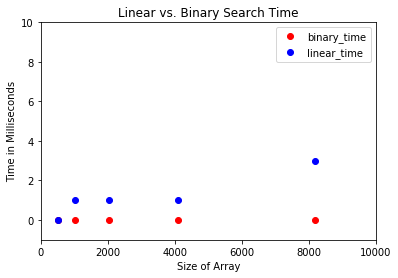

In [10]:
# Create plot of time versus complexity of array

# Plot Binary Time
plt.plot(df['len'], df['binary_time'], 'ro')

# Plot Linear Time
plt.plot(df['len'], df['linear_time'], 'bo')

# Label Graph
plt.ylabel('Time in Milliseconds')
plt.xlabel('Size of Array')
plt.title('Linear vs. Binary Search Time')

#Create Legend and define axes
plt.legend()
plt.axis([0, 10000, -1, 10])
plt.show()

Simple visualization demonstrates how much more effective binary search is compared to linear search.  Binary search is almost uneffected by the increase in the size of the array.

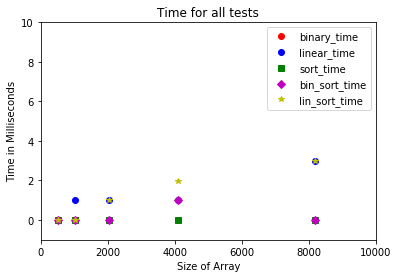

In [11]:
# Create plot of time versus complexity of array

# Plot Binary Time
plt.plot(df['len'], df['binary_time'], 'ro')

# Plot Linear Time
plt.plot(df['len'], df['linear_time'], 'bo')

# Plot Sort Time
plt.plot(df['len'], df['sort_time'], 'gs')

# Plot binary + Sort Time
plt.plot(df['len'], df['bin_sort_time'], 'mD')

# Plot binary + Sort Time
plt.plot(df['len'], df['lin_sort_time'], 'y*')

# Label Graph
plt.ylabel('Time in Milliseconds')
plt.xlabel('Size of Array')
plt.title('Time for all tests')

#Create Legend and define axes
plt.legend()
plt.axis([0, 10000, -1, 10])
plt.show()

The resulting graphic for all tests performed as part of this assigment.  
The quickest and best perfomance was from binary search.  Even when you have to incorporate an additional step (sort) the perfomance is signifcatnly better than linear and will scale as the data grows.  Data engineers are required to consider how to ensure that an operation can perform effectively at scale.  Beyond the lesson that the algorithm is a more effective form of searching, it is the exercise and the discipline of understanding Big O notation that will enable data engineers to be more effective.